# English Premier League

## Step 01

In [118]:
# Load the packages

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
# Load the data.
# EPL results for the 2017-2018 season 

EPL = pd.read_excel('EPL2017-18.xlsx')
print(EPL.columns.tolist())

['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR']


In [120]:
# The datafile contains 6 variables: the date, home team, away team, goals scored (FTHG),
# goals against (FTAG) andthe result (H- home win, D- draw, A – away win).

EPL

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,20170811,Arsenal,Leicester,4,3,H
1,20170812,Brighton,Man City,0,2,A
2,20170812,Chelsea,Burnley,2,3,A
3,20170812,Crystal Palace,Huddersfield,0,3,A
4,20170812,Everton,Stoke,1,0,H
...,...,...,...,...,...,...
375,20180513,Newcastle,Chelsea,3,0,H
376,20180513,Southampton,Man City,0,1,A
377,20180513,Swansea,Stoke,1,2,A
378,20180513,Tottenham,Leicester,5,4,H


## Step 02

In [121]:
# Create a value for a home wins (win = 1, draw = 0.5, loss = 0) and away wins and a count variable for each game (=1)

EPL['hwinvalue'] = np.where(EPL['FTR'] == 'H', 1, np.where(EPL['FTR'] == 'D',.5,0))
EPL['awinvalue'] = np.where(EPL['FTR'] == 'A', 1, np.where(EPL['FTR'] == 'D',.5, 0))
EPL['count'] = 1

## Step 03

In [122]:
# Create a file for games played in 2017 (before date 20180000) and another for games played in 2018 (after date 20180000)

G2017 = EPL[EPL.Date < 20180000] # Games 2017
G2017.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,hwinvalue,awinvalue,count
0,20170811,Arsenal,Leicester,4,3,H,1.0,0.0,1
1,20170812,Brighton,Man City,0,2,A,0.0,1.0,1
2,20170812,Chelsea,Burnley,2,3,A,0.0,1.0,1
3,20170812,Crystal Palace,Huddersfield,0,3,A,0.0,1.0,1
4,20170812,Everton,Stoke,1,0,H,1.0,0.0,1


In [123]:
G2018 = EPL[EPL.Date > 20180000] # Games 2018
G2018.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,hwinvalue,awinvalue,count
209,20180101,Brighton,Bournemouth,2,2,D,0.5,0.5,1
210,20180101,Burnley,Liverpool,1,2,A,0.0,1.0,1
211,20180101,Everton,Man United,0,2,A,0.0,1.0,1
212,20180101,Leicester,Huddersfield,3,0,H,1.0,0.0,1
213,20180101,Stoke,Newcastle,0,1,A,0.0,1.0,1


###  Step 03 (2017 Home & Away Games)

In [124]:
# For the 2017 games, use .groupby to create a dataframe aggregating by home team the variables for count, 
# home wins, goals for and goals against.  Then, use .groupby to  create a separate dataframe aggregating by away 
# team the variables for count, away wins, goals for and goals against. Rename the variables to denote whether they 
# are aggregates for home team or away team.

# Games 2017

# Home Team 2017
Home_G2017 = G2017.groupby('HomeTeam')['count', 'hwinvalue', 'FTHG', 'FTAG'].sum().reset_index()
Home_G2017 = Home_G2017.rename(columns={'HomeTeam':'team','count':'PH','hwinvalue':'hwin','FTHG':'FTHGh','FTAG':'FTAGh'})
print(Home_G2017)

# Away Team 2017
Away_G2017 = G2017.groupby('AwayTeam')['count', 'awinvalue', 'FTHG', 'FTAG'].sum().reset_index()
Away_G2017 = Away_G2017.rename(columns={'AwayTeam':'team','count':'PA','awinvalue':'awin','FTHG':'FTHGa','FTAG':'FTAGa'})
print(Away_G2017)

              team  PH  hwin  FTHGh  FTAGh
0          Arsenal  10   8.5     25     10
1      Bournemouth  11   4.5     14     17
2         Brighton  10   5.5     10     12
3          Burnley  10   6.0      7      6
4          Chelsea  11   8.5     21      7
5   Crystal Palace  11   5.0     14     18
6          Everton  10   6.5     17     13
7     Huddersfield  11   6.0     10     12
8        Leicester  10   5.0     13     14
9        Liverpool  11   8.5     21      4
10        Man City  10   9.5     36      7
11      Man United  11   9.0     24      5
12       Newcastle  11   4.0      9     13
13     Southampton  11   5.0     13     15
14           Stoke  10   5.0     13     19
15         Swansea  10   3.0      6     15
16       Tottenham  10   7.5     21      8
17         Watford  11   4.5     14     23
18       West Brom  11   4.5     10     15
19        West Ham   9   4.0     10     14
              team  PA  awin  FTHGa  FTAGa
0          Arsenal  11   5.0     16     13
1      Bour

C:\Users\samab\AppData\Local\Temp/ipykernel_1868/1692252992.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Home_G2017 = G2017.groupby('HomeTeam')['count', 'hwinvalue', 'FTHG', 'FTAG'].sum().reset_index()
C:\Users\samab\AppData\Local\Temp/ipykernel_1868/1692252992.py:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Away_G2017 = G2017.groupby('AwayTeam')['count', 'awinvalue', 'FTHG', 'FTAG'].sum().reset_index()


## Step 04 (2017 Home & Away Games)

In [125]:
# Merge the home and away dataframes.
EPL_2017 = pd.merge(Home_G2017, Away_G2017, on = ['team'])
EPL_2017

,team,PH,hwin,FTHGh,FTAGh,PA,awin,FTHGa,FTAGa
0,Arsenal,10,8.5,25,10,11,5.0,16,13
1,Bournemouth,11,4.5,14,17,10,3.0,15,6
2,Brighton,10,5.5,10,12,11,3.0,13,5
3,Burnley,10,6.0,7,6,11,6.5,11,11
4,Chelsea,11,8.5,21,7,10,7.0,7,18
5,Crystal Palace,11,5.0,14,18,10,2.5,14,4
6,Everton,10,6.5,17,13,11,3.5,19,8
7,Huddersfield,11,6.0,10,12,10,3.0,20,8
8,Leicester,10,5.0,13,14,11,5.0,18,18
9,Liverpool,11,8.5,21,4,10,6.5,20,27


## Step 5 (2017 Home & Away Games)

In [126]:
# Sum the values of home and away wins, games, goals for and goals against, 
# then create the values for win percentage (wpc) and the Pythagorean expectation (pyth). 

# The Math for 2017

EPL_2017['W'] = EPL_2017['hwin'] + EPL_2017['awin']
EPL_2017['G'] = EPL_2017['PH'] + EPL_2017['PA']
EPL_2017['GF'] = EPL_2017['FTHGh'] + EPL_2017['FTAGa']
EPL_2017['GA'] = EPL_2017['FTAGh'] + EPL_2017['FTHGa']

# Win Percentage 2017 (wpc_2017)

EPL_2017['wpc_2017'] = EPL_2017['W']/EPL_2017['G']

#Pythagorean Expectation 2017 (pyth_2017)

EPL_2017['pyth_2017'] = EPL_2017['GF']**2/(EPL_2017['GF']**2 + EPL_2017['GA']**2)

EPL_2017

,team,PH,hwin,FTHGh,FTAGh,PA,awin,FTHGa,FTAGa,W,G,GF,GA,wpc_2017,pyth_2017
0,Arsenal,10,8.5,25,10,11,5.0,16,13,13.5,21,38,26,0.642857,0.681132
1,Bournemouth,11,4.5,14,17,10,3.0,15,6,7.5,21,20,32,0.357143,0.280899
2,Brighton,10,5.5,10,12,11,3.0,13,5,8.5,21,15,25,0.404762,0.264706
3,Burnley,10,6.0,7,6,11,6.5,11,11,12.5,21,18,17,0.595238,0.528548
4,Chelsea,11,8.5,21,7,10,7.0,7,18,15.5,21,39,14,0.738095,0.885847
5,Crystal Palace,11,5.0,14,18,10,2.5,14,4,7.5,21,18,32,0.357143,0.240356
6,Everton,10,6.5,17,13,11,3.5,19,8,10.0,21,25,32,0.476190,0.379018
7,Huddersfield,11,6.0,10,12,10,3.0,20,8,9.0,21,18,32,0.428571,0.240356
8,Leicester,10,5.0,13,14,11,5.0,18,18,10.0,21,31,32,0.476190,0.484131
9,Liverpool,11,8.5,21,4,10,6.5,20,27,15.0,21,48,24,0.714286,0.800000


###  Step 03 (2018 Home & Away Games)

In [127]:
# Games 2018

# Home Team 2018
Home_G2018 = G2018.groupby('HomeTeam')['count', 'hwinvalue', 'FTHG', 'FTAG'].sum().reset_index()
Home_G2018 = Home_G2018.rename(columns={'HomeTeam':'team','count':'PH','hwinvalue':'hwin','FTHG':'FTHGh','FTAG':'FTAGh'})
print(Home_G2018.head())

# Away Team 2018
Away_G2018 = G2018.groupby('AwayTeam')['count', 'awinvalue', 'FTHG', 'FTAG'].sum().reset_index()
Away_G2018 = Away_G2018.rename(columns={'AwayTeam':'team','count':'PA','awinvalue':'awin','FTHG':'FTHGa','FTAG':'FTAGa'})
print(Away_G2018.head())

          team  PH  hwin  FTHGh  FTAGh
0      Arsenal   9   7.5     29     10
1  Bournemouth   8   5.0     12     13
2     Brighton   9   5.5     14     13
3      Burnley   9   3.5      9     11
4      Chelsea   8   4.5      9      9
          team  PA  awin  FTHGa  FTAGa
0      Arsenal   8   1.0     15      7
1  Bournemouth   9   4.0     16     13
2     Brighton   8   1.5     16      5
3      Burnley   8   4.0     11      9
4      Chelsea   9   4.5     15     14


C:\Users\samab\AppData\Local\Temp/ipykernel_1868/1062089947.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Home_G2018 = G2018.groupby('HomeTeam')['count', 'hwinvalue', 'FTHG', 'FTAG'].sum().reset_index()
C:\Users\samab\AppData\Local\Temp/ipykernel_1868/1062089947.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Away_G2018 = G2018.groupby('AwayTeam')['count', 'awinvalue', 'FTHG', 'FTAG'].sum().reset_index()


##  Step 04 (2018 Home & Away Games)

In [128]:
# Merge the home and away dataframes.
EPL_2018= pd.merge(Home_G2018, Away_G2018, on = ['team'])
EPL_2018.head()

,team,PH,hwin,FTHGh,FTAGh,PA,awin,FTHGa,FTAGa
0,Arsenal,9,7.5,29,10,8,1.0,15,7
1,Bournemouth,8,5.0,12,13,9,4.0,16,13
2,Brighton,9,5.5,14,13,8,1.5,16,5
3,Burnley,9,3.5,9,11,8,4.0,11,9
4,Chelsea,8,4.5,9,9,9,4.5,15,14


## Step 05 (2018 Home & Away Games)

In [129]:
# Sum the values of home and away wins, games, goals for and goals against, 
# then create the values for win percentage (wpc) and the Pythagorean expectation (pyth). 

# The Math for 2018

EPL_2018['W'] = EPL_2018['hwin'] + EPL_2018['awin']
EPL_2018['G'] = EPL_2018['PH'] + EPL_2018['PA']
EPL_2018['GF'] = EPL_2018['FTHGh'] + EPL_2018['FTAGa']
EPL_2018['GA'] = EPL_2018['FTAGh'] + EPL_2018['FTHGa']

# Win Percentage 2018 (wpc_2018)

EPL_2018['wpc_2018'] = EPL_2018['W']/EPL_2018['G']

#Pythagorean Expectation 2017 (pyth_2017)

EPL_2018['pyth_2018'] = EPL_2018['GF']**2/(EPL_2018['GF']**2 + EPL_2018['GA']**2)

EPL_2018

,team,PH,hwin,FTHGh,FTAGh,PA,awin,FTHGa,FTAGa,W,G,GF,GA,wpc_2018,pyth_2018
0,Arsenal,9,7.5,29,10,8,1.0,15,7,8.5,17,36,25,0.500000,0.674649
1,Bournemouth,8,5.0,12,13,9,4.0,16,13,9.0,17,25,29,0.529412,0.426330
2,Brighton,9,5.5,14,13,8,1.5,16,5,7.0,17,19,29,0.411765,0.300333
3,Burnley,9,3.5,9,11,8,4.0,11,9,7.5,17,18,22,0.441176,0.400990
4,Chelsea,8,4.5,9,9,9,4.5,15,14,9.0,17,23,24,0.529412,0.478733
5,Crystal Palace,8,4.5,15,9,9,4.5,14,12,9.0,17,27,23,0.529412,0.579491
6,Everton,9,5.5,11,9,8,2.5,17,8,8.0,17,19,26,0.470588,0.348120
7,Huddersfield,8,2.5,6,13,9,2.5,13,4,5.0,17,10,26,0.294118,0.128866
8,Leicester,9,5.0,12,8,8,2.5,20,13,7.5,17,25,28,0.441176,0.443577
9,Liverpool,8,7.0,24,6,9,5.0,8,12,12.0,17,36,14,0.705882,0.868633


## Plotting the Data

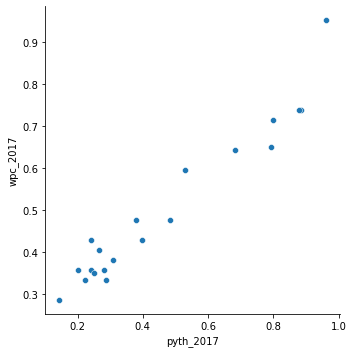

In [130]:
# 2017 Data

sns.relplot(x="pyth_2017", y="wpc_2017", data =EPL_2017)

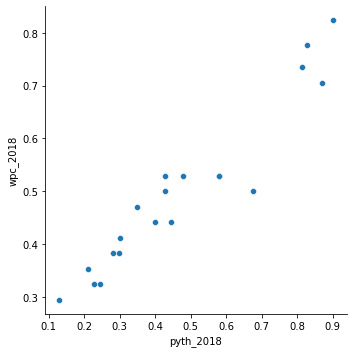

In [131]:
# 2018 Data

sns.relplot(x="pyth_2018", y="wpc_2018", data =EPL_2018)

## Regression

In [132]:
# 2017

pyth_lm = smf.ols(formula = 'wpc_2017 ~ pyth_2017', data=EPL_2017).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               wpc_2017   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     269.6
Date:                Mon, 08 May 2023   Prob (F-statistic):           2.81e-12
Time:                        10:45:54   Log-Likelihood:                 33.822
No. Observations:                  20   AIC:                            -63.64
Df Residuals:                      18   BIC:                            -61.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1978      0.021      9.335      0.000       0.153       0.242
pyth_2017      0.6551      0.040     16.420      0.000       0.571       0.739
==============================================================================
Omnibus:                        6.775   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                4.322
Skew:                           1.048   Prob(JB):                        0.115
Kurtosis:                       3.891   Cond. No.                         4.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
# 2018 

pyth_lm = smf.ols(formula = 'wpc_2018 ~ pyth_2018', data=EPL_2018).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               wpc_2018   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     191.1
Date:                Mon, 08 May 2023   Prob (F-statistic):           5.02e-11
Time:                        10:45:54   Log-Likelihood:                 34.030
No. Observations:                  20   AIC:                            -64.06
Df Residuals:                      18   BIC:                            -62.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2040      0.024      8.586      0.000       0.154       0.254
pyth_2018      0.6237      0.045     13.823      0.000       0.529       0.718
==============================================================================
Omnibus:                        5.199   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                2.933
Skew:                          -0.826   Prob(JB):                        0.231
Kurtosis:                       3.890   Cond. No.                         5.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Step 7

In [134]:
# Now merge 2017 and 2018 summary files.

EPL_merge = pd.merge(EPL_2017, EPL_2018[['team', 'wpc_2018', 'pyth_2018']], on = 'team')

In [135]:
EPL_merge

,team,PH,hwin,FTHGh,FTAGh,PA,awin,FTHGa,FTAGa,W,G,GF,GA,wpc_2017,pyth_2017,wpc_2018,pyth_2018
0,Arsenal,10,8.5,25,10,11,5.0,16,13,13.5,21,38,26,0.642857,0.681132,0.500000,0.674649
1,Bournemouth,11,4.5,14,17,10,3.0,15,6,7.5,21,20,32,0.357143,0.280899,0.529412,0.426330
2,Brighton,10,5.5,10,12,11,3.0,13,5,8.5,21,15,25,0.404762,0.264706,0.411765,0.300333
3,Burnley,10,6.0,7,6,11,6.5,11,11,12.5,21,18,17,0.595238,0.528548,0.441176,0.400990
4,Chelsea,11,8.5,21,7,10,7.0,7,18,15.5,21,39,14,0.738095,0.885847,0.529412,0.478733
5,Crystal Palace,11,5.0,14,18,10,2.5,14,4,7.5,21,18,32,0.357143,0.240356,0.529412,0.579491
6,Everton,10,6.5,17,13,11,3.5,19,8,10.0,21,25,32,0.476190,0.379018,0.470588,0.348120
7,Huddersfield,11,6.0,10,12,10,3.0,20,8,9.0,21,18,32,0.428571,0.240356,0.294118,0.128866
8,Leicester,10,5.0,13,14,11,5.0,18,18,10.0,21,31,32,0.476190,0.484131,0.441176,0.443577
9,Liverpool,11,8.5,21,4,10,6.5,20,27,15.0,21,48,24,0.714286,0.800000,0.705882,0.868633


# Step 9

In [137]:
# Generate a correlation matrix for the wpc and pyth variables for 2017 and 2018

keyvars = EPL_merge[['team','wpc_2018','wpc_2017','pyth_2017','pyth_2018']]
keyvars.corr()

,wpc_2018,wpc_2017,pyth_2017,pyth_2018
wpc_2018,1.000000,0.756573,0.795693,0.955986
wpc_2017,0.756573,1.000000,0.968204,0.745832
pyth_2017,0.795693,0.968204,1.000000,0.795331
pyth_2018,0.955986,0.745832,0.795331,1.000000


In [138]:
keyvars = keyvars.sort_values(by=['wpc_2018'],ascending=False)
keyvars

,team,wpc_2018,wpc_2017,pyth_2017,pyth_2018
10,Man City,0.823529,0.952381,0.962743,0.900000
16,Tottenham,0.777778,0.650000,0.791775,0.827144
11,Man United,0.735294,0.738095,0.878385,0.812744
9,Liverpool,0.705882,0.714286,0.800000,0.868633
12,Newcastle,0.529412,0.333333,0.286281,0.580552
4,Chelsea,0.529412,0.738095,0.885847,0.478733
5,Crystal Palace,0.529412,0.357143,0.240356,0.579491
1,Bournemouth,0.529412,0.357143,0.280899,0.426330
0,Arsenal,0.500000,0.642857,0.681132,0.674649
19,West Ham,0.500000,0.350000,0.251037,0.428934
